# Diving into Housing Sales in Washington D.C. and King County
Washington D.C. and King County are two very different geographically located cities in the United States. Both are major cities that attract a lot of demand for housing availability. King County, which includes major cities like Seattle and Bellevue, consists of many housing units that are in high demand because of Seattle's tech hub. Washington D.C. boasts many historical landmarks and job opportunity especially involving the government. Located on opposite sides of the country, it is very interesting to look at how housing may differ and what could be in high demand depending on if you want to move to the east or west coast.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
from matplotlib import cm
import datetime as dt

In [2]:
# Grab dataframe containing police reports
# Create df on Macbook
# dc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
# kc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

# Create df on PC
dc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
kc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

dc_df = dc_df.drop(columns='Unnamed: 0')
kc_df = kc_df.drop(columns='Unnamed: 0')

In [3]:
dc_df.head()

,price,date,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,location
0,993500.0,2014-10-08,5.0,3,1148.0,814,2.0,Very Good,Average,1907,2014,DC
1,1280000.0,2014-08-19,2.5,3,1630.0,1000,2.0,Good,Good Quality,1906,2004,DC
2,1440000.0,2015-04-22,3.5,4,1686.0,1424,2.0,Very Good,Above Average,1908,2015,DC
3,1050000.0,2014-12-23,2.0,2,1440.0,1800,2.0,Average,Above Average,1885,1984,DC
4,900000.0,2014-06-05,1.5,2,1728.0,900,3.0,Good,Average,1880,2003,DC


In [4]:
kc_df.head()

,price,date,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,location
0,221900.0,2014-10-13,1.00,3,1180.0,5650,1.0,Good,Excellent,1955,0,KC
1,538000.0,2014-12-09,2.25,3,2570.0,7242,2.0,Good,Excellent,1951,1991,KC
2,180000.0,2015-02-25,1.00,2,770.0,10000,1.0,Good,Very Good,1933,0,KC
3,604000.0,2014-12-09,3.00,4,1960.0,5000,1.0,Excellent,Excellent,1965,0,KC
4,510000.0,2015-02-18,2.00,3,1680.0,8080,1.0,Good,Superior,1987,0,KC


# Are houses more likely to sell at specific times of the year?

In [30]:
# Grab housing sale datas from each data set
dc_dates = pd.to_datetime(dc_df.date)
kc_dates = pd.to_datetime(kc_df.date)

# Split number of sales per month
dc_sales = dc_dates.dt.month.value_counts().sort_index()
kc_sales = kc_dates.dt.month.value_counts().sort_index()

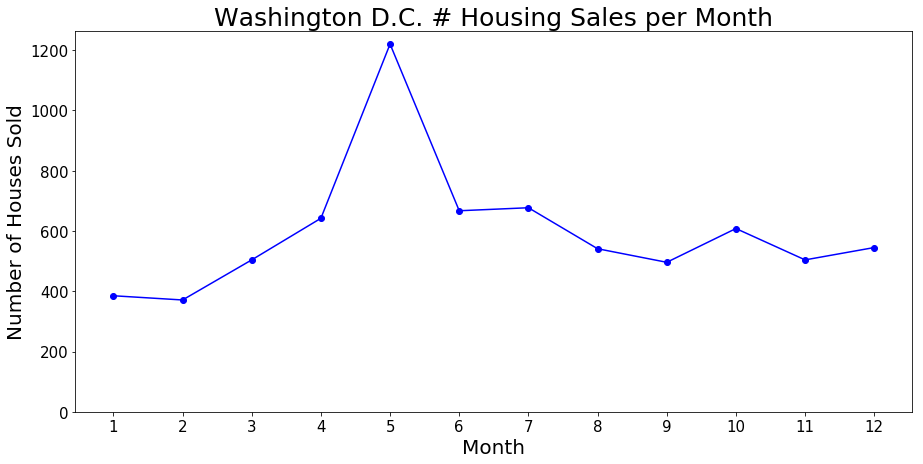

In [35]:
# Create figure to display housing sales per month for Washington D.C.
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(dc_sales.index, dc_sales.values, 'o-b')

# Set title and axis labels
ax.set_title("Washington D.C. # Housing Sales per Month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number of Houses Sold", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize = 15)

# Show all months on x-axis and start graph at y=0
plt.xticks(dc_sales.index)
ax.set_ylim(bottom=0)

plt.show()

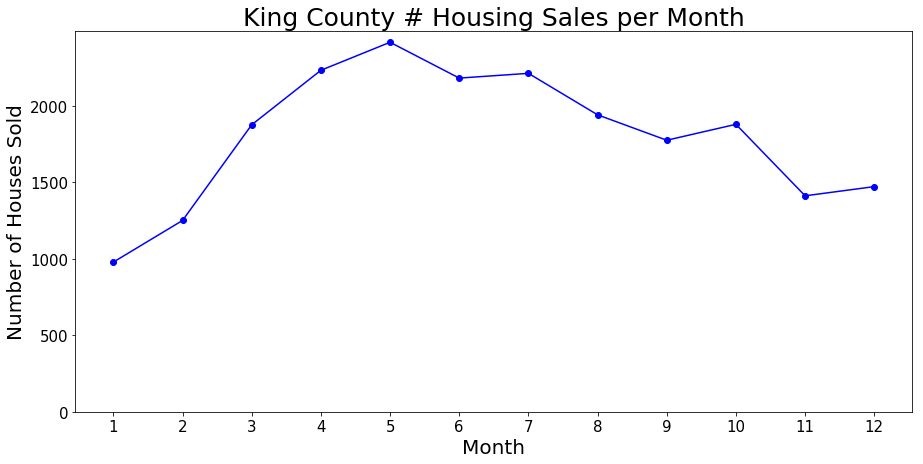

In [36]:
# Create figure to display housing sales per month for Washington D.C.
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(kc_sales.index, kc_sales.values, 'o-b')

# Set title and axis labels
ax.set_title("King County # Housing Sales per Month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number of Houses Sold", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize = 15)

# Show all months on x-axis and start graph at y=0
plt.xticks(kc_sales.index)
ax.set_ylim(bottom=0)

plt.show()

### Response:
By aggregating the housing sales by month for each data set, it highlights that selling in May is the most common for both geographical locations. It is interesting to note that in King County, the immediate months preceding and proceeding May are much closer to the peak number of houses sold compared to those months in Washington D.C. There is an obvious increase in sales in May, with the surrounding months dropping in sales significantly.

# Descriptive Statistics for Bedrooms, Bathrooms, Square Feet of Living, and Square Feet of Lot

In [43]:
# Grab bedrooms and bathrooms columns
dc_beds = dc_df.bedrooms
kc_beds = kc_df.bedrooms

#### D.C. Bathroom Stats

In [44]:
dc_beds.describe()

count    7160.000000
mean        2.556564
std         1.383210
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        12.000000
Name: bedrooms, dtype: float64

In [48]:
dc_beds.value_counts().sort_index()

0      268
1     1463
2     1837
3     2007
4     1085
5      309
6      121
7       39
8       24
9        4
11       1
12       2
Name: bedrooms, dtype: int64

#### King County Bathroom Stats

In [45]:
kc_beds.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [49]:
kc_beds.value_counts().sort_index()

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Response:
Looking at the bathroom value counts helps distinguish some interesting outliers. It appears that in King County, there is a housing unit that was sold with 33 bathrooms. There are only single cases where certain housing units had a significantly larger number of bathrooms, and I may leave this outlier out in the future. It is also worth noting that King County had an average of almost 1 more bathroom on average per house sale (which could be due to the outlier of the house with 33 bathrooms).